#  Artificial Intelligence Capstone Project on E-Commerce

### Project Task: Week 1

### Importing libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re  
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
# import string
import warnings
# ! pip install wordcloud
#from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder,LabelBinarizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score, recall_score,roc_curve, roc_auc_score, auc

import tensorflow as tf
from tensorflow import keras
from sklearn.utils import class_weight
from sklearn.preprocessing import label_binarize
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Dropout,GRU
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler


Using TensorFlow backend.


In [2]:
train = pd.read_csv("train_data.csv")
train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [3]:
test_val= pd.read_csv("test_data_hidden.csv")
test_val.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [4]:
test= pd.read_csv("test_data.csv")
test.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


### Exploratory Data Analysis

In [17]:
train.duplicated().sum(), test.duplicated().sum(), test_val.duplicated().sum()

(2, 3, 3)

Train dataset contains 58 duplicate records and train dataset contains 3 duplicate records.

In [5]:
train = train[train.duplicated()==False]
train.shape

(3942, 8)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3942 entries, 0 to 3999
Data columns (total 8 columns):
name                 3942 non-null object
brand                3942 non-null object
categories           3942 non-null object
primaryCategories    3942 non-null object
reviews.date         3942 non-null object
reviews.text         3942 non-null object
reviews.title        3932 non-null object
sentiment            3942 non-null object
dtypes: object(8)
memory usage: 277.2+ KB


In [7]:
test_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
name                 1000 non-null object
brand                1000 non-null object
categories           1000 non-null object
primaryCategories    1000 non-null object
reviews.date         1000 non-null object
reviews.text         1000 non-null object
reviews.title        997 non-null object
sentiment            1000 non-null object
dtypes: object(8)
memory usage: 62.6+ KB


Train dataset contains 10 missing values in 'reviews.title' column and test dataset contains 3 missing values in 'reviews.title' column.

In [8]:
pd.set_option('display.max_colwidth',200)

Reviews containing Positive Sentiments

In [9]:
train[train.sentiment=='Positive'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
0,"Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ads, Amazon need this to subsidize the tablet and wi...",Powerful tablet
1,I purchased two Amazon in Echo Plus and two dots plus four fire sticks and the hub Philips hue for lamp for the family at Christmas 2017. I‚Äôm so happy with these purchases and learning so much w...,Amazon Echo Plus AWESOME
3,"very good product. Exactly what I wanted, and a very good price",Greattttttt
4,This is the 3rd one I've purchased. I've bought one for all of my nieces. No other case compares to this one. It has held protected the tablet so many times from them dropping it.,Very durable!
5,This is a great product. Light weight. I wish it has wifi to download from online.,You will love it
7,Purchased this for my son. Has room to upgrade memory to allow more books & games. But the speakers could be better or located in a better position.,Great for kids or smaller needs
8,"Bought this for my mom and it was just what she needed and at a great price. Been wanting to get an Ipad for myself, but think this might be a great less expensive option for me as well.",Great tablet
10,"I got this tablet to replace my sons old one, I love the adult/child profile and the ability to have the 2 year replacement warranty. The case has also came in handy many times.",Great Tablet
11,Great product for the kids gaming apps parental controls to make sure you can monitor kids and prevent unwanted app purchases,Works great
12,Love the choice of colors. Have two kindles of my own and purchased this for a gift.,great pad for both children and adults


Reviews containing Neutral Sentiments

In [10]:
train[train.sentiment=='Neutral'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
2,Just an average Alexa option. Does show a few things on screen but still limited.,Average
6,"My 7-year old daughter saved up to by this. Her brother bought the 8GB about a year earlier, so new she needed more space. The OS is a bit clunky, and less intuitive then on higher priced tablets,...",OK For Entry Level Tablet
17,"Not as good as before the old kindle, just seams to work better",Not as good as before
59,There is nothing spectacular about this item but also nothing majorly wrong with it. The biggest flaw is that this is geared to kids and there is no way that I have found searching settings or onl...,"Does what it says, missing one key feature"
95,It's unfair for me to rate this product cause I have not even taken it out of the box to set it up.,Haven't set it up yet
114,I bought this as s present for my 65 year old grandma. She loves it. Very easy to operate. No issues,Solid tablet
146,Bought this tablet for 8 year old. It holding up good & she loves it. She enjoys playimg her games & being able to get on the internet.,Fire tablet
147,"bought a few kindles in the past but this time one of it came defective. the port was bent and it was hard to charge but still possible. comes in 4 different color. was 16gb enough space for kids,...",Came defective
148,"Not a substitute for an iPad, but a really good tablet for reading and minimal internet usage.",Good Reader
187,This device is a good if you are looking for a starter tablet for a young individual.,Good for 4 year old


Reviews containing Negative Sentiments

In [11]:
train[train.sentiment=='Negative'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
9,"was cheap, can not run chrome stuff, returned to store.","was cheap, can not run chrome stuff, returned"
97,"Worthless, except as a regular echo and a poor excuse for video chat. I love my echo devices, bathroom, pool, kitchen, other places where I may need hands free, voice activated music and info. My ...",Useless screen so why pay for it?
104,Too bad Amazon turned this tablet into a big advertising tool. Many apps dont work and the camera is not good.,Amazon Fire 7 Tablet
121,"I bought this Kindle for my 7 year old grand-daughter. I bought a warranty for it. I bought it in August, I have already had to replace it. The charger connection got loose and was not charging. W...",Kid's Kindle
150,"I am reading positive reviews and wish I could say the same. Best Buy is great, so this is not a reflection on them, just our experience with the product. We have had this product for just over on...",Have never purchased a more frustrating Device
151,"I have to say it was a little confusing and frustrating when i was not getting the verification code from amazon , i waited for 20 minutes then i requested another code, nothing... then a nother o...",not big fan
249,It's a good device for children because they don't know any better,Good for kids
267,"the speaker voice quality is terrible compare the similar size my logitech UE BOOM.the price is too high, even I got on promotion with $79","terrible product,bad voice quality"
368,Needs to be a stand alone device. I should have not required to use a tablet of Cell phone to make it work. Amazon needs to work on the technology on device.,Needs to be a stand alone device
530,Has a very good Bluetooth speakers sound quality is good but otherwise she's pretty useless when it comes to get answering questions,Good Bluetooth speaker


In [12]:
train.sentiment.value_counts()

Positive    3694
Neutral      158
Negative      90
Name: sentiment, dtype: int64

#### Class Imbalance Problem
In the train dataset, we have 3,749 (~95.1%) sentiments labeled as positive, and 1,58 (~4%) sentiments labeled as Neutral and 93(~2.35%) sentiments as Negative. So, it is an imbalanced classification problem.

In [13]:
pd.DataFrame(train.name.value_counts())

,name
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",676
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",628
Amazon - Echo Plus w/ Built-In Hub - Silver,483
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",446
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",340
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",294
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,177
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",175
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",122
"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum",82


In [ ]:
# name = pd.DataFrame(train.name.str.split(',').tolist()).stack().unique()
# name = pd.DataFrame(name,columns=['name'])
# name

In [14]:
train.brand.value_counts() , test_val.brand.value_counts()

(Amazon    3942
 Name: brand, dtype: int64, Amazon    1000
 Name: brand, dtype: int64)

In [15]:
train.primaryCategories.value_counts()

Electronics                    2562
Electronics,Hardware           1159
Office Supplies,Electronics     204
Electronics,Media                17
Name: primaryCategories, dtype: int64

In [16]:
test_val.primaryCategories.value_counts()

Electronics                    676
Electronics,Hardware           276
Office Supplies,Electronics     41
Electronics,Media                7
Name: primaryCategories, dtype: int64

In [17]:
pd.DataFrame(train.categories.value_counts())

,categories
"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",628
"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants",514
"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital Device 3",483
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",446
"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",340
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",294
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",231
"Amazon Echo,Home Theater & Audio,MP3 MP4 Player Accessories,Electronics,Portable Audio,Compact Radios Stereos,Smart Hubs & Wireless Routers,Featured Brands,Smart Home & Connected Living,Home Security,Kindle Store,Electronic Components,Home Automation,Mobile Bluetooth Speakers,Home, Garage & Office,Amazon Tap,Home,Mobile Speakers,TVs & Electronics,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Electronics Features,Frys,Speakers,Mobile,Digital Device 3,Smart Home,Home Improvement,Electronics, Tech Toys, Movies, Music,Smart Home & Home Automation Devices,Smart Hubs,MP3 Player Accessories,Home Safety & Security,Voice Assistants,Amazon Home,Alarms & Sensors,Portable Audio & Electronics,Amazon Devices,Audio,Bluetooth Speakers,MP3 Accessories,All Bluetooth & Wireless Speakers",177
"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Wireless Speakers,Smart Home,Home Improvement,Voice Assistants,Amazon Home,Amazon",162
"Office,eBook Readers,Electronics Features,Walmart for Business,Tablets,Electronics,Amazon Ereaders,Office Electronics,iPad & Tablets,Kindle E-readers,All Tablets,Amazon Book Reader,Computers & Tablets",122


In [ ]:
# categories = pd.DataFrame(train.categories.str.split(',').tolist()).stack().unique()
# categories = pd.DataFrame(categories,columns=['Categories'])
# categories

In [18]:
train.dtypes

name                 object
brand                object
categories           object
primaryCategories    object
reviews.date         object
reviews.text         object
reviews.title        object
sentiment            object
dtype: object

### Data Cleaning

In [6]:
del train['brand']
del test_val['brand']
del test['brand']

train['reviews.date'] = train['reviews.date'].str.split('T').str[0]
test_val['reviews.date'] = test_val['reviews.date'].str.split('T').str[0]
test['reviews.date'] = test['reviews.date'].str.split('T').str[0]

train['reviews_day'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.day
train['reviews_month'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.month
train['reviews_year'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.year

test_val['reviews_day'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.day
test_val['reviews_month'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.month
test_val['reviews_year'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.year

test['reviews_day'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.day
test['reviews_month'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.month
test['reviews_year'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.year

del train['reviews.date']
del test['reviews.date']
del test_val['reviews.date']

train.head()

,name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,26,12,2016
1,Amazon - Echo Plus w/ Built-In Hub - Silver,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,17,1,2018
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",Just an average Alexa option. Does show a few ...,Average,Neutral,20,12,2017
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...","eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","very good product. Exactly what I wanted, and ...",Greattttttt,Positive,4,8,2017
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...","Computers/Tablets & Networking,Tablets & eBook...",Electronics,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,23,1,2017


In [7]:
name = list(set(list(train['name'])+list(test_val['name'])))
categories = list( set( list( train['categories']) + list(test_val['categories'])))
primaryCategories = list(train['primaryCategories'].unique())

le_name = LabelEncoder()
le_cat = LabelEncoder()
le_pri = LabelEncoder()
le_name.fit(name)
le_cat.fit(categories)
le_pri.fit(primaryCategories)

train['name'] = le_name.transform(train.name)
train['categories'] = le_cat.transform(train.categories)
train['primaryCategories'] = le_pri.transform(train.primaryCategories)
test_val['name'] = le_name.transform(test_val.name)
test_val['categories'] = le_cat.transform(test_val.categories)
test_val['primaryCategories'] = le_pri.transform(test_val.primaryCategories)
test['name'] = le_name.transform(test.name)
test['categories'] = le_cat.transform(test.categories)
test['primaryCategories'] = le_pri.transform(test.primaryCategories)

In [8]:
train['reviews.title'].fillna(value=' ',inplace=True)
test_val['reviews.title'].fillna(value=' ',inplace=True)
test['reviews.title'].fillna(value=' ',inplace=True)

In [9]:
tok = WordPunctTokenizer()
ps = PorterStemmer()
wnl = WordNetLemmatizer()
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
def data_cleaner(text):
    text = text.replace(r"Äú",'')
    text = text.replace(r'Äù','')
    text = text.replace(r'‚Äô','\'')
    text = text.lower()
    text = text.replace(r'‚Äô','\'')
    text = neg_pattern.sub(lambda x: negations_dic[x.group()], text)
    text = re.sub("[^a-zA-Z0-9\"]", " ", text)
    word_tok=[x for x in tok.tokenize(text) if len(x) > 3]
#     word_stem = [ps.stem(i) for i in word_tok]
#     return (" ".join(word_stem).strip())  
    word_lem = [wnl.lemmatize(i) for i in word_tok]
    return (" ".join(word_lem).strip()) 
for i in (train,test_val,test):
    i['reviews.text']=i['reviews.text'].apply(data_cleaner)
    i['reviews.title']=i['reviews.title'].apply(data_cleaner)    

In [58]:
#test[['reviews.text','reviews.title']].head(10)

### Visualization

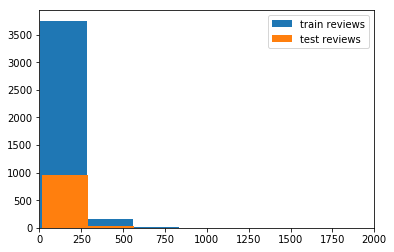

In [23]:
train_len=train["reviews.text"].str.len()
test_len=test["reviews.text"].str.len()
plt.hist(train_len,bins=20,label="train reviews")
plt.hist(test_len,bins=20,label="test reviews")
plt.legend()
plt.xlim(0,2000)
plt.show()

In [25]:
#all_text = ' '.join([text for text in train['reviews.text']])
pos_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Positive']])
neg_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Negative']])
neu_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Neutral']])

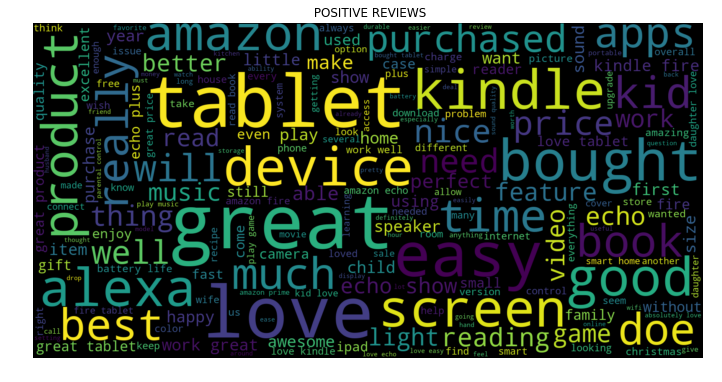

In [28]:
wordcloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=180).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' POSITIVE REVIEWS')
plt.show()

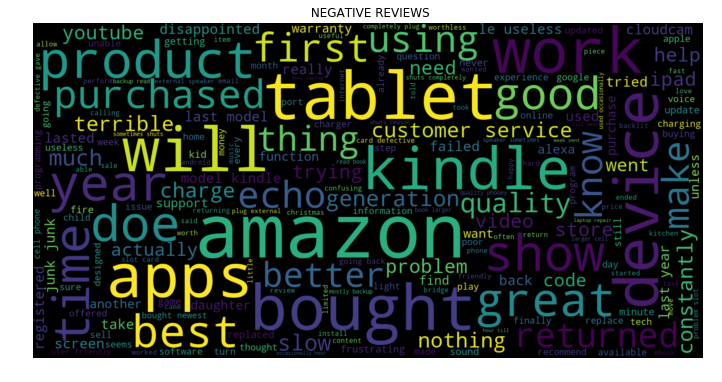

In [29]:
wordcloud = WordCloud(height=800, width=1600, random_state=21,max_font_size=180).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' NEGATIVE REVIEWS')
plt.show()

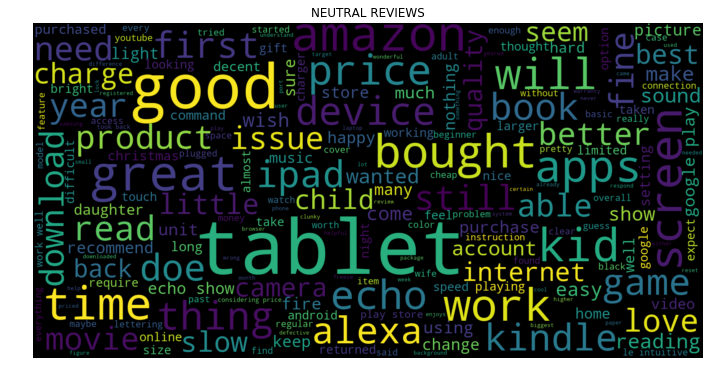

In [30]:
wordcloud = WordCloud(height=800, width=1600, random_state=21,max_font_size=180).generate(neu_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('NEUTRAL REVIEWS')
plt.show()

In [10]:
le_senti = LabelEncoder()
train['sentiment'] = le_senti.fit_transform(train['sentiment'])
test_val['sentiment'] = le_senti.fit_transform(test_val['sentiment'])

#### TFIDF Vectorizer

In [10]:
tvec1 = TfidfVectorizer()
tvec2 = TfidfVectorizer()
tvec3 = TfidfVectorizer()

In [11]:
train1 = train.reset_index()
combi1 = train1.append(test_val,ignore_index=True,sort=False)
tvec1.fit(combi1['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train1['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())
tvec2.fit(combi1['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train1['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())
Train1 = pd.concat([train1.drop(['reviews.text','reviews.title','sentiment','index'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val1 = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train1=Train1.values
y_train1=train['sentiment'].values
x_val1=Test_Val1.values
y_val1 = test_val['sentiment'].values

In [12]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction import text

punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]
tvec3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
reviews=tvec3.fit_transform(combi1['reviews.text'])
words = tvec3.get_feature_names()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


### Multinomial Naive Bayes

In [100]:
nb = MultinomialNB()
nb.fit(Train1.values,train1['sentiment'])
y_pred = nb.predict(Test_Val1.values)
y_val = test_val['sentiment']
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)

[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000

93.7


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Everything is classified as Positive because of Imbalance Class

### Project Task: Week 2

### Tackling Class Imbalance Problem:

In [12]:
train.sentiment.value_counts()

Positive    3694
Neutral      158
Negative      90
Name: sentiment, dtype: int64

In [17]:
count_2, count_1, count_0 =train.sentiment.value_counts()
class_2 = train[train.sentiment==2]
class_1 = train[train.sentiment==1]
class_0 = train[train.sentiment==0]

#### UnderSampling

In [18]:
class_2_under = class_2.sample(count_1)
train_under= pd.concat([class_2_under,class_1,class_0],axis=0)
print(train_under.shape)
print(train_under.sentiment.value_counts())

(406, 9)
2    158
1    158
0     90
Name: sentiment, dtype: int64


#### OverSampling

In [19]:
class_0_over = class_0.sample(count_2,replace=True)
class_1_over = class_1.sample(count_2,replace=True)
train_over = pd.concat([class_2,class_0_over,class_1_over],axis=0)
print(train_over.shape)
print(train_over.sentiment.value_counts())


(11082, 9)
2    3694
1    3694
0    3694
Name: sentiment, dtype: int64


In [44]:
lr= LogisticRegression(C=30, class_weight='balanced', solver='sag', 
                         multi_class='multinomial', n_jobs=6, random_state=40, 
                         verbose=1, max_iter=1000)

#### TFIDF Vectorizer for under-sampled data

In [47]:
train = train_under.reset_index(drop=True) 
combi = train.append(test_val , ignore_index=True)
print(combi.shape)

tvec1.fit(combi['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(combi['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train=Train.values
y_train=train['sentiment']
x_val=Test_Val.values
y_val = test_val['sentiment']

(1406, 9)


#### Logistic Regresiion for under-sampled data

In [46]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


max_iter reached after 24 seconds
[[ 10   6   8]
 [ 15   7  17]
 [314 195 428]]
              precision    recall  f1-score   support

           0       0.03      0.42      0.06        24
           1       0.03      0.18      0.06        39
           2       0.94      0.46      0.62       937

   micro avg       0.45      0.45      0.45      1000
   macro avg       0.34      0.35      0.24      1000
weighted avg       0.89      0.45      0.58      1000

accuracy :  44.5


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:   24.4s finished


0.5284636556242508


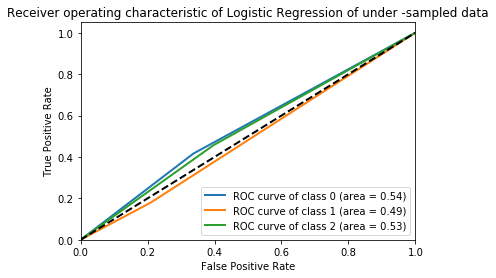

In [47]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression of under -sampled data')
plt.legend(loc="lower right")
plt.show()


#### TFIDF Vectorizer for over-sampled data

In [20]:
train = train_over.reset_index(drop=True) 

tvec1.fit(train['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(train['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)

Train.to_csv('Train.csv',encoding='utf-8')
Test_Val.to_csv('Test_Val.csv',encoding='utf-8')

x_train=Train.values
y_train=train['sentiment'].values
x_val=Test_Val.values
y_val = test_val['sentiment'].values

#### Logistic Regression for over-sampled data

In [56]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


max_iter reached after 1000 seconds
[[ 13   3   8]
 [ 10  10  19]
 [214 171 552]]
              precision    recall  f1-score   support

           0       0.05      0.54      0.10        24
           1       0.05      0.26      0.09        39
           2       0.95      0.59      0.73       937

   micro avg       0.57      0.57      0.57      1000
   macro avg       0.35      0.46      0.31      1000
weighted avg       0.90      0.57      0.69      1000

accuracy :  57.49999999999999


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed: 16.7min finished


Logistic Regression on over-sampled data is perfrorming better than under-sampled data 

0.5804294901632032


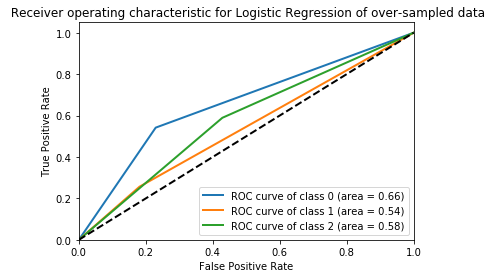

In [58]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic for Logistic Regression of over-sampled data')
plt.legend(loc="lower right")
plt.show()


#### Multinomial Naive Bayes

In [109]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)
print(nb.score(x_train,y_train))
print(nb.score(x_val,y_val))

[[ 12   3   9]
 [  4  13  22]
 [  9  78 850]]
              precision    recall  f1-score   support

           0       0.48      0.50      0.49        24
           1       0.14      0.33      0.20        39
           2       0.96      0.91      0.94       937

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.53      0.58      0.54      1000
weighted avg       0.92      0.88      0.90      1000

87.5
0.9589424291644107
0.875


0.6979688244204161


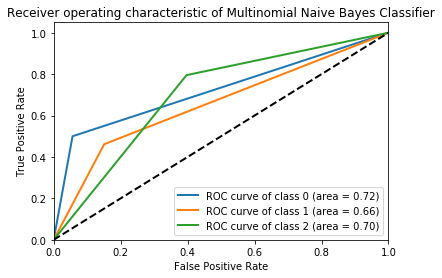

In [60]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Multinomial Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()


#### RandomForestClassifier

In [36]:
rf= RandomForestClassifier(n_estimators=400,random_state=10).fit(x_train,y_train)
y_pred=rf.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)
print(rf.score(x_train,y_train))
print(rf.score(x_val,y_val))

[[  6   0  18]
 [  0   4  35]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        24
           1       1.00      0.10      0.19        39
           2       0.95      1.00      0.97       937

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.98      0.45      0.52      1000
weighted avg       0.95      0.95      0.93      1000

accuracy :  94.69999999999999
1.0
0.947


0.5793650793650793


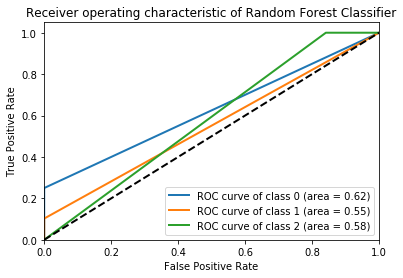

In [41]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()


#### XGBClassifier

In [27]:
xgb= XGBClassifier(n_estimators=1000,max_depth=6).fit(x_train,y_train)
y_pred=xgb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

[[ 11   2  11]
 [  3  13  23]
 [  1   8 928]]
              precision    recall  f1-score   support

           0       0.73      0.46      0.56        24
           1       0.57      0.33      0.42        39
           2       0.96      0.99      0.98       937

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.75      0.59      0.65      1000
weighted avg       0.94      0.95      0.95      1000

95.19999999999999
1.0
0.952


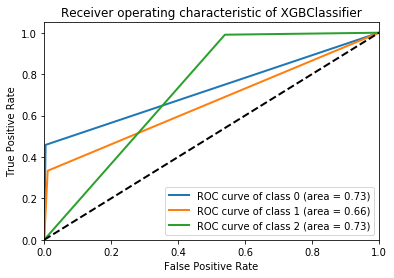

In [40]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of XGBClassifier')
plt.legend(loc="lower right")
plt.show()

We can see that XGBoost is performing better in predicting all the classes.

#### multi-class SVM

In [54]:
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0).fit(x_train, y_train) 
y_pred=svc.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

[[ 12   3   9]
 [  7  18  14]
 [ 23  82 832]]
              precision    recall  f1-score   support

           0       0.29      0.50      0.36        24
           1       0.17      0.46      0.25        39
           2       0.97      0.89      0.93       937

   micro avg       0.86      0.86      0.86      1000
   macro avg       0.48      0.62      0.52      1000
weighted avg       0.93      0.86      0.89      1000

accuracy :  86.2


0.7578666991324146


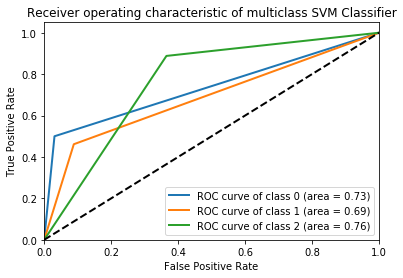

In [55]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of multiclass SVM Classifier')
plt.legend(loc="lower right")
plt.show()

### Project Task: Week 3

#### Neural Network

In [93]:
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train1),
                                                 y_train1)

In [87]:
classifier = Sequential()
classifier.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_dim=x_train1.shape[1]))
classifier.add(Dense(units=80,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=80,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
#adam = Adam(lr=0.0001)
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train1,y_train2,batch_size=256,epochs=100,verbose=0)
y_pred = classifier.predict(x_val1, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val1, y_pred_bool))
print(classification_report(y_val1, y_pred_bool))

[[  9   1  14]
 [  0  12  27]
 [  2   7 928]]
              precision    recall  f1-score   support

           0       0.82      0.38      0.51        24
           1       0.60      0.31      0.41        39
           2       0.96      0.99      0.97       937

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.79      0.56      0.63      1000
weighted avg       0.94      0.95      0.94      1000



In [65]:
# Using Class-Weights
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train1.shape[1]))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train1,y_train2,batch_size=256,epochs=100,class_weight=class_weights,verbose=0)
y_pred = classifier.predict(x_val1, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val1, y_pred_bool))
print(classification_report(y_val1, y_pred_bool))

[[  9   2  13]
 [  0  12  27]
 [  2   8 927]]
              precision    recall  f1-score   support

           0       0.82      0.38      0.51        24
           1       0.55      0.31      0.39        39
           2       0.96      0.99      0.97       937

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.77      0.56      0.63      1000
weighted avg       0.94      0.95      0.94      1000



Using class-weights does not improve the performance

In [73]:
#using dropouts
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train1.shape[1]))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train1,y_train2,batch_size=256,epochs=100,class_weight=class_weights,verbose=0)
y_pred = classifier.predict(x_val1, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val1, y_pred_bool))
print(classification_report(y_val1, y_pred_bool))

[[  9   6   9]
 [  0  15  24]
 [  0  16 921]]
              precision    recall  f1-score   support

           0       1.00      0.38      0.55        24
           1       0.41      0.38      0.39        39
           2       0.97      0.98      0.97       937

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.79      0.58      0.64      1000
weighted avg       0.94      0.94      0.94      1000



Using drop out chances of predicting second class increases

In [88]:
y_train3 = label_binarize(y_train, classes=[0, 1, 2])

In [90]:
#for over-sampled data
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train.shape[1]))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=150,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train,y_train3,batch_size=256,epochs=10,verbose=0)
y_pred = classifier.predict(x_val, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val, y_pred_bool))
print(classification_report(y_val, y_pred_bool))

[[ 10   1  13]
 [  0  11  28]
 [  2  11 924]]
              precision    recall  f1-score   support

           0       0.83      0.42      0.56        24
           1       0.48      0.28      0.35        39
           2       0.96      0.99      0.97       937

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.76      0.56      0.63      1000
weighted avg       0.94      0.94      0.94      1000



Using Over-sampled data for neural network does not improve the performance

### ensemble technique using Voting Classifier: XGboost + oversampled_multinomial_NB

In [15]:
from sklearn.ensemble import VotingClassifier
model1 = MultinomialNB()
model2 =  XGBClassifier(n_estimators=1000,max_depth=6)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
y_pred = model.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

[[ 14   2   8]
 [  3  15  21]
 [ 14  88 835]]
              precision    recall  f1-score   support

           0       0.45      0.58      0.51        24
           1       0.14      0.38      0.21        39
           2       0.97      0.89      0.93       937

   micro avg       0.86      0.86      0.86      1000
   macro avg       0.52      0.62      0.55      1000
weighted avg       0.92      0.86      0.89      1000

accuracy :  86.4


We can see that the above model performs almost same as oversampled multinomial model but it increases the chances of  prediction of minority classes.

#### Sentiment Score

In [16]:
from textblob import TextBlob
def senti(x):
    return TextBlob(x).sentiment 
def polarity(x):
    return TextBlob(x).polarity+1
 
train['senti_score'] = train['reviews.text'].apply(senti)
test_val['senti_score'] = test_val['reviews.text'].apply(senti)

train['polarity'] =train['reviews.text'].apply(polarity)
test_val['polarity'] = test_val['reviews.text'].apply(polarity)

train.senti_score.head()

0     (0.37479166666666663, 0.6791666666666667)
1    (0.45821428571428574, 0.49821428571428567)
2                    (0.69, 0.6033333333333335)
3                              (0.1875, 0.4375)
4                   (0.6000000000000001, 0.725)
Name: senti_score, dtype: object

In [17]:
Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment','senti_score'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment','senti_score'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train=Train.values
y_train=train['sentiment']
x_val=Test_Val.values
y_val = test_val['sentiment']

In [18]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)
print(nb.score(x_train,y_train))
print(nb.score(x_val,y_val))

[[ 12   4   8]
 [  3  15  21]
 [ 10  79 848]]
              precision    recall  f1-score   support

           0       0.48      0.50      0.49        24
           1       0.15      0.38      0.22        39
           2       0.97      0.91      0.93       937

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.53      0.60      0.55      1000
weighted avg       0.92      0.88      0.90      1000

87.5
0.9554232088070745
0.875


Sentiment Score does not have much affect on the performance

### Project Task: Week 4

#### LSTM

In [95]:
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])
epochs = 4
emb_dim = 128
batch_size = 256
model = Sequential()
model.add(Embedding(100, emb_dim, input_length=x_train1.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train1, y_train2, epochs=epochs, batch_size=batch_size)
y_pred = model.predict(x_val1, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val1, y_pred_bool))
print(classification_report(y_val1, y_pred_bool))

Epoch 1/4
3942/3942 [==============================] - 175s 44ms/step - loss: 0.8268 - acc: 0.7808
Epoch 2/4
3942/3942 [==============================] - 171s 43ms/step - loss: 0.3332 - acc: 0.9371
Epoch 3/4
3942/3942 [==============================] - 173s 44ms/step - loss: 0.2979 - acc: 0.9371
Epoch 4/4
3942/3942 [==============================] - 171s 43ms/step - loss: 0.2867 - acc: 0.9371
[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
#using clas_weights
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train1),y_train1)
emb_dim = 128                                                 
epochs = 4
batch_size = 256
model = Sequential()
model.add(Embedding(x_train1.shape[1], emb_dim, input_length=x_train1.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train1, y_train2, epochs=epochs, batch_size=batch_size,class_weight=class_weights)
y_pred = model.predict(x_val1, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val1, y_pred_bool))
print(classification_report(y_val1, y_pred_bool))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/4
3942/3942 [==============================] - 170s 43ms/step - loss: 0.8322 - acc: 0.8095
Epoch 2/4
3942/3942 [==============================] - 165s 42ms/step - loss: 0.3274 - acc: 0.9371
Epoch 3/4
3942/3942 [==============================] - 170s 43ms/step - loss: 0.3017 - acc: 0.9371
Epoch 4/4
3942/3942 [==============================] - 173s 44ms/step - loss: 0.2816 - acc: 0.9371
[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.31      0.33      0.32      10

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
#for over_sampled data
y_train2 = label_binarize(y_train, classes=[0, 1, 2])
emb_dim = 128                                                 
epochs = 3
batch_size = 256
model = Sequential()
model.add(Embedding(x_train.shape[1], emb_dim, input_length=x_train.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train, y_train2, epochs=epochs, batch_size=batch_size)
y_pred = model.predict(x_val, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val, y_pred_bool))
print(classification_report(y_val, y_pred_bool))

Epoch 1/3
11082/11082 [==============================] - 443s 40ms/step - loss: 1.1012 - acc: 0.3352
Epoch 2/3
11082/11082 [==============================] - 441s 40ms/step - loss: 1.1000 - acc: 0.3302
Epoch 3/3
11082/11082 [==============================] - 438s 40ms/step - loss: 1.1004 - acc: 0.3308
[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### GRU

In [16]:
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])
epochs = 3
emb_dim = 128
batch_size = 256
model = Sequential()
model.add(Embedding(x_train1.shape[1], emb_dim, input_length=x_train1.shape[1]))
#model.add(SpatialDropout1D(0.7))
model.add(GRU(64, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train1, y_train2, epochs=epochs, batch_size=batch_size)
y_pred = model.predict(x_val1, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_val1, y_pred_bool))
print(classification_report(y_val1, y_pred_bool))

Epoch 1/3
3942/3942 [==============================] - 145s 37ms/step - loss: 0.7598 - acc: 0.8595
Epoch 2/3
3942/3942 [==============================] - 144s 37ms/step - loss: 0.3209 - acc: 0.9371
Epoch 3/3
3942/3942 [==============================] - 142s 36ms/step - loss: 0.2832 - acc: 0.9371
[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


We can see from above that LSTM and GPU models iare not efficient in predicting minor classes.ANN is performing quite good in solving class imbalance problem but it cannot beat traditional ML agorithms.

#### Clustering of Reviews

In [24]:
print(words[250:300])

['disappoint', 'discov', 'display', 'distract', 'doe', 'doesnt', 'dollar', 'dont', 'door', 'doorbel', 'dot', 'doubl', 'downfal', 'download', 'downsid', 'drain', 'drawback', 'drive', 'drop', 'durabl', 'dure', 'earli', 'earlier', 'eas', 'easi', 'easier', 'easili', 'ebook', 'echo', 'edg', 'edit', 'educ', 'effect', 'effici', 'effort', 'electron', 'els', 'email', 'employe', 'enabl', 'end', 'endless', 'enjoy', 'enlarg', 'entertain', 'entir', 'entri', 'environ', 'equip', 'eread']


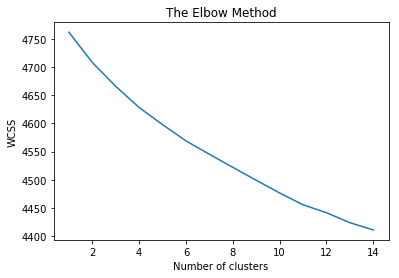

In [33]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,n_jobs=-1)
    kmeans.fit(reviews)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As no proper elbow is generated, I will have to select right amount of clusters by trial and error. So, I will showcase the results of different amount of clusters to find out the right amount of clusters.

#### 11 Clusters

In [29]:
kmeans = KMeans(n_clusters = 11, n_init = 20, n_jobs = -1) 
kmeans.fit(reviews)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : veri, easi, happi, great, product, love, tablet, help, satisfi, pleas, purchas, durabl, bought, nice, best, work, price, amazon, use, qualiti, grandson, recommend, child, learn, enjoy
1 : echo, plus, love, alexa, amazon, great, music, sound, video, like, product, light, devic, work, screen, famili, hous, featur, better, just, bulb, bought, purchas, easi, thing
2 : kindl, read, love, book, great, upgrad, easi, best, light, size, like, screen, veri, purchas, bought, better, second, model, want, batteri, origin, replac, use, year, charg
3 : home, smart, alexa, devic, great, echo, addit, autom, control, music, amazon, love, product, work, connect, light, purchas, video, item, easi, googl, just, hous, abl, bulb
4 : gift, love, christma, bought, purchas, great, easi, wife, perfect, tablet, absolut, gave, price, product, kindl, year, kid, veri, mother, birthday, enjoy, daughter, work, good, famili
5 : great, work, product, price, easi, recommend, kid, sound, tablet, love, read, app, bough

#### 13 Clusters

In [30]:
kmeans = KMeans(n_clusters = 13, n_init = 20, n_jobs = -1) 
kmeans.fit(reviews)
# We look at 13 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : alexa, music, love, home, light, smart, devic, play, question, great, turn, hous, thing, listen, speaker, control, like, amazon, just, abl, sound, news, famili, weather, kitchen
1 : game, play, love, tablet, watch, read, year, enjoy, video, book, daughter, grandson, great, bought, educ, easi, movi, learn, granddaught, download, app, realli, good, time, purchas
2 : love, bought, gift, christma, year, purchas, grandson, birthday, absolut, daughter, easi, granddaught, wife, great, tablet, parent, mother, perfect, price, gave, like, grandkid, famili, best, learn
3 : good, tablet, price, veri, product, work, qualiti, sound, easi, pretti, read, recommend, nice, great, pictur, love, devic, amazon, size, speaker, child, valu, realli, time, gift
4 : kindl, love, read, great, purchas, upgrad, better, best, model, replac, year, second, size, gift, easi, bought, veri, tablet, like, origin, screen, use, version, light, doe
5 : batteri, life, great, long, charg, easi, tablet, read, good, kindl, 

#### Topic Modelling

In [13]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
# Tweak the two parameters below
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(reviews)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, tvec3, number_words)

Topics found via LDA:

Topic #0:
tablet great kindl amazon read just good app batteri book

Topic #1:
light kindl read like page screen love turn voyag button

Topic #2:
sound look great speaker easi good need love exact just

Topic #3:
parent love great control easi tablet download book purchas kid

Topic #4:
love tablet doe everyth great price awesom work bought beat

Topic #5:
recommend great good product price tablet veri easi friend high

Topic #6:
love christma gift bought kid great present tablet grandson kindl

Topic #7:
echo alexa music home love great smart light amazon devic

Topic #8:
tablet love game play year bought daughter learn granddaught easi

Topic #9:
love easi veri happi great purchas bought camera wife kindl
